In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/content/virus_initial.csv')

In [0]:
import pickle
 
with open('/content/virus_lemmatized_file', 'rb') as lemmatized_file:
    lemmatized_text = pickle.load(lemmatized_file)

In [0]:
df = pd.DataFrame([' '.join(i) for i in lemmatized_text])
df.columns = ['text']

In [0]:
import random
import seaborn as sns

In [0]:
palette = sns.cubehelix_palette(20, start=2, rot=0, dark=0.15, light=.8, reverse=True)
random.shuffle(palette)

In [0]:
def get_time_series(df, word, number =60):
  length = df.shape[0]
  size = int(length/number)

  flag= []
  for i in range(number):
    flag += [i+1]*size
  flag = flag + [number+1]*(length- size*number)
  assert len(flag)==length

  df['day'] = flag

  score ={}
  for i in range(1,number+1):
    week = df[df['day']==i]
    score[i]=0
    for _,line in week.iterrows():
      if word in line['text']:
        score[i]+=1

  sns.set(rc={'figure.figsize':(12,12)})
  ax = sns.lineplot(x="day", y="score", data=pd.DataFrame({'day':list(score.keys()), 'score':list(score.values())})).set(title = 'Загадування категорії ' + word.upper()+' по днях');

None


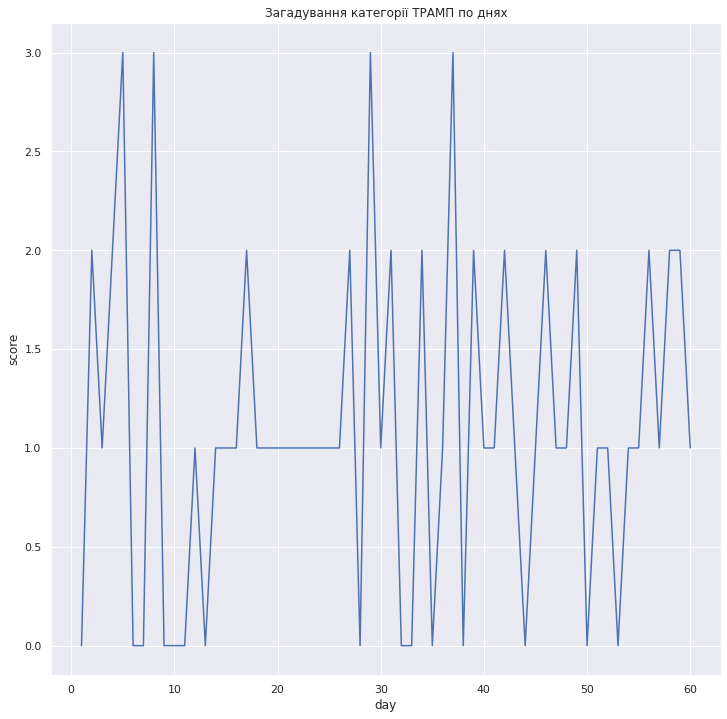

In [354]:
print(get_time_series(df,'трамп', number = 60))

In [0]:
def get_correlation(df, words):
  result = []
  for _,i in df.iterrows():
    if all(x in i.text for x in words):
      result += [''.join(i.text)]
  return result

In [384]:
tramp_putin = get_correlation(df, ['трамп', 'путін'])
print('Згадки Путіна та Трампа поруч: ')
tramp_putin

Згадки Путіна та Трампа поруч: 


['трамп обговорити путін контроль озброєння коронавірус новина',
 'трамп поговорити путін коронавірус контроль озброєння',
 'трамп путін обговорити контроль озброєння коронавірус',
 'путін поговорити трамп говорити зброя коронавірус',
 'трамп обговорити путін контроль озброєння коронавірус']

In [385]:
putin_ze = get_correlation(df, ['путін', 'зеленський'])
print('Згадки Зеленського та Путіна поруч: ')
putin_ze

Згадки Зеленського та Путіна поруч: 


['ого росія почати казати схожий правда путін заявити ситуація залишатися дуже складний той час ще тисяча особа перебувати медичний нагляд підозра коронавірус карл чути зеленський зачиняти кордон україна завтра бути пізно']

In [393]:
trump_ze = get_correlation(df, ['трамп', 'зеленський'])
print('Згадки Зеленського та Трампа поруч: ')
trump_ze

Згадки Зеленського та Трампа поруч: 


['ти русний порохоботівякщо ви не алкаш зеленський ти якщо не за даун трамп за левак потім дивитися зйомка конференція трамп різниця в тиждень перший правда коронавірус грип на другий тисяча смерть і всираватися']

In [387]:
ukr_rus = get_correlation(df, ['україна', 'росія'])
print('Згадки України та Росії поруч: ')
ukr_rus

Згадки України та Росії поруч: 


['премєр росія мішустіна виявити коронавірус новина еспресо україна',
 'здоровʼя коронавірус росія доба майже стільки новий випадок в україна весь час',
 'медведчук поширювати україна російський фейка коронавірус держдеп сша госдеп також нагадати інспірований росія фейка бути озвучений ефір український телеканал належати бізнесмен ігор коломойський',
 'премєр росія мішустіна виявити коронавірус новина еспресо україна',
 'україна росія обігнати китай кількість хворий коронавірус ніякий вибух нема під контроль весь готуватися марш смертний полкураєя впердя',
 'україна прем’єрміністр росія виявити коронавірус',
 'тест коронавірус рф неякісний саме том білорусь відмовитися вони використання повернути росія тобто порівнювати цей питання україна росія некоректно',
 'трішки карма засновник телеканал царгород тв спонсор війна росія україна константин малофєєв захворіти коронавірус',
 'ого росія почати казати схожий правда путін заявити ситуація залишатися дуже складний той час ще тисяча особа 

In [388]:
ukr_usa = get_correlation(df, ['україна', 'сша'])
print('Згадки України та США поруч: ')
ukr_usa

Згадки України та США поруч: 


['медведчук поширювати україна російський фейка коронавірус держдеп сша помощья',
 'медведчук поширювати україна російський фейка коронавірус держдеп сша',
 'коронавірус україна високий смертність сша пять новина ви могти проспати',
 'медведчук поширювати україна російський фейка коронавірус держдеп сша госдеп також нагадати інспірований росія фейка бути озвучений ефір український телеканал належати бізнесмен ігор коломойський',
 'коронавірус світ понад млн хворий сша рф утримувати лідерство темп інфікування новина еспресо україна помощья',
 'держдеп сша медведчук коломойський поширювати україна російський фейка коронавірус несподіванка',
 'медведчук поширювати україна російський фейка коронавірус держдеп сша',
 'медведчук поширити російський фейк коронавірус кремль проводити дезінфа кампанія україна вірменія проти сша походження вірус деза булий поширений україна підготовлений кдб адвокат заявити держдеп',
 'медведчук поширювати україна російський фейка коронавірус держдеп сша',
 'кор

In [390]:
rus_usa = get_correlation(df, ['рф', 'сша'])
print('Згадки Росії та США поруч: ')
rus_usa

Згадки Росії та США поруч: 


['їздити село сусід хв дізнатися коронавірус китай вилікувати сода підтвердити відомий ютублікар рф інший не лікувати сода західний фармкорп заробити корона зробити сша усунення нафтовий пляма карантин ловити католиківсатанист',
 'коронавірус світ сша мітингувати рф кількість хворий зростати рекордно швидко',
 'коронавірус світ понад млн хворий сша рф утримувати лідерство темп інфікування новина еспресо україна помощья',
 'коронавірус світ понад млн хворий сша рф утримувати лідерство темп інфікування']

In [391]:
mos_who = get_correlation(df, ['моз', 'вооз'])
print('Згадки МОЗ та ВООЗ поруч: ')
mos_who

Згадки МОЗ та ВООЗ поруч: 


['моз пропонувати пом’якшувати карантин тільки порада вооз україна коронавірус карантин']

In [392]:
mos_upc = get_correlation(df, ['моз', 'упц'])
print('Згадки МОЗ та УПЦ поруч: ')
mos_upc

Згадки МОЗ та УПЦ поруч: 


[]